# IMDB Review Classification using neural networks and deep learning

### Loading our packages

In [1]:
from tensorflow import keras

C:\Users\johnl\Anaconda\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


### Loading our dataset
Our dataset is already built into the kera package so we can simply import it 

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


The argument num_words=10000 means that we will only keep the top 10,000 most<br>
frequently occurring words in the training data.<br>
This will save us some space and rarer words are going to be of less use to us anyway so we wont be missing any key data.<br> 
Each review is a train_data/test_data list of word indices (encoding a sequence of words). <br>
train_labels test_labels and are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive"<br>


In [3]:
#train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

### Translate to English
we have a dictionary making a word to a unique number, so we can reverse the dictionary to translate the sequence of numbers into english

In [4]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


## Data Preparation

We need to convert our lists into tensors to feed into our network, we also need to standardise as obviously the reviews will differ in length

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

The list of integers would be very difficult to feed the network. The lengths of reviews varies, fractional values between any integers have no meaning (e.g. what if on the output we get 43.5, what does it mean?)

So we created a single long vector, the size of the entire dictionary, dictionary=10000. We will then associate each element/index of this vector with one word/word_id. So word represented by word id 14 will now be represented by 14-th element of this vector.

Each element will either be 0 (word is not present in the review) or 1 (word is present in the review). And we can treat this as a probability, so we even have meaning for values in between 0 and 1. Furthermore, every review will now be represented by this very long (sparse) vector which has a constant length for every review.

### Encoding our targets

In [14]:

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Network Model

 A relu (rectified linear unit) is a function meant to zero-out negative values <br>
 A sigmoid "squashes" arbitrary values into the interval, [0, 1], thus outputting something that can be interpreted as a probability.

In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


We are creating a layer that will only accept as input 2D tensors where the first
dimension is (the zero-th dimension, the batch dimension, is unspecified and thus 10,000
any value would be accepted). And this layer will return a tensor where the first
dimension has been transformed to be 16 

Crossentropy is usually the best choice when you are dealing
with models that output probabilities. Crossentropy is a quantity from the field of
Information Theory, that measures the "distance" between probability distributions, or in
our case, between the ground-truth distribution and our predictions.

### Compile Model

In [16]:
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])

The fundamental trick in deep learning is to use the loss function  as a feedback signal to
adjust the value of the weights by a little bit, in a direction that would lower the loss
score for the current example. This adjustment is the job of the "optimizer", which
implements what is called the "backpropagation" algorithm

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Now we have three data sets, our training data, validation data and testing data

A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.

- **Training set:** A set of examples used for learning, that is to fit the parameters of the classifier.

- **Validation set:** A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.

- **Test set:** A set of examples used only to assess the performance of a fully-specified classifier.

## Model Training

In [18]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 334us/step - loss: 0.5119 - acc: 0.7930 - val_loss: 0.3862 - val_acc: 0.8615
Epoch 2/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.3047 - acc: 0.9009 - val_loss: 0.3000 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.2167 - acc: 0.9305 - val_loss: 0.2805 - val_acc: 0.8883
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1728 - acc: 0.9425 - val_loss: 0.2996 - val_acc: 0.8821
Epoch 5/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1377 - acc: 0.9565 - val_loss: 0.2844 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1120 - acc: 0.9657 - val_loss: 0.2992 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.0929 - acc: 0.9719 - val_loss: 0.3174 - 

### What Is a Loss Function and Loss?
In the context of an optimization algorithm, the function used to evaluate a candidate solution (i.e. a set of weights) is referred to as the objective function.

We may seek to maximize or minimize the objective function, meaning that we are searching for a candidate solution that has the highest or lowest score respectively.

Typically, with neural networks, we seek to minimize the error. As such, the objective function is often referred to as a cost function or a loss function and the value calculated by the loss function is referred to as simply “loss.”

In [19]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

### Plotting the training and validation loss

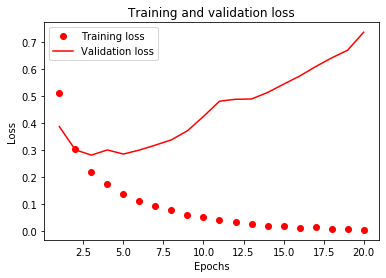

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

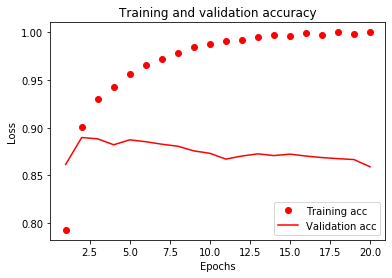

In [24]:
plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- The dots are the training loss and accuracy, while the solid lines are the validation
loss and accuracy. 
- The training loss decreases with every epoch and the training accuracy
increases with every epoch. That’s what you would expect when running gradient
descent optimization—the quantity you are trying to minimize should get lower with
every iteration.
- The model performs well on the training data isn’t working well on data it has never seen before.
- This is **overfitting**
- **Overfitting** is the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.
- After the second epoch, we are over-optimizing on the training data, and we
ended up learning representations that are specific to the training data and do not
generalize to data outside of the training set.


## Re-training the model

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)
results = model.evaluate(x_test, y_test)


Epoch 1/10
25000/25000 [==============================] - 26s 1ms/step - loss: 0.3307 - accuracy: 0.8560
Epoch 2/10
25000/25000 [==============================] - 6s 257us/step - loss: 0.1825 - accuracy: 0.9274
Epoch 3/10
25000/25000 [==============================] - 9s 346us/step - loss: 0.1206 - accuracy: 0.9509
Epoch 4/10
25000/25000 [==============================] - 8s 309us/step - loss: 0.0733 - accuracy: 0.9710
Epoch 5/10
25000/25000 [==============================] - 5s 219us/step - loss: 0.0459 - accuracy: 0.9830
Epoch 6/10
25000/25000 [==============================] - 5s 217us/step - loss: 0.0247 - accuracy: 0.9912
Epoch 7/10
25000/25000 [==============================] - 6s 230us/step - loss: 0.0150 - accuracy: 0.9951
Epoch 8/10
25000/25000 [==============================] - 6s 231us/step - loss: 0.0155 - accuracy: 0.9945
Epoch 9/10
25000/25000 [==============================] - 6s 227us/step - loss: 0.0070 - accuracy: 0.9978
Epoch 10/10
25000/25000 [======================

loss: 0.0116 - accuracy: 0.9961

### What Is a Batch?
- The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

- A batch is like a for loop , we iterate over one more samples and we make predictions. When we finish with that batch of samples we compare our predictions with the expected outputs and calculate an error. We then use this error to update our algorithm to improve our model

- **Batch Gradient Descent.** Batch Size = Size of Training Set
- **Stochastic Gradient Descent.** Batch Size = 1
- **Mini-Batch Gradient Descent.** 1 < Batch Size < Size of Training Set

If the dataset is not divided evenly by the batch size the final batch will be the remainder


### What is Epoch?
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

### Predictions

In [32]:
model.predict(x_test)

array([[0.00951004],
       [0.99999815],
       [0.99999964],
       ...,
       [0.3490713 ],
       [0.0049175 ],
       [0.91083336]], dtype=float32)

## Conclusions

- We have to pre process our data so that we can feed it into our neural network, we need to transform it to a tensor we often times cant just simply pass of raw data 

- Encoding as binary vectors is a simple, effective encoding option for seqeunces of words
- Stacks of dense layers with activation relu will be the bread and butter, and can be used to solve many problems such as our sentiment classification

- In binary classification problems (problems with two outputs) we should end our model with a dense layer with 1 unit and sigmoid activiation, this always us to encode a prob

- Loss function for two class outputs and the outputs are sigmoid in nature should be binary_crossentropy

- As they get better on their training data, neural networks eventually start and overfitting
end up obtaining increasingly worse results on data never-seen-before. Make sure to
always monitor performance on data that is outside of the training set.


